# Relationship between property value and crimes

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


crimes = pd.read_csv('./data_visualization/data/by_precinct_year.out',
                     sep='\t', header=None)
value = pd.read_csv('./data_visualization/data/value_by_year_precinct.out',
                    sep='\t', header=None)

value = value.sort_values(0)
crimes = crimes.sort_values(0)

# Filter out data with no year
crimes = crimes[crimes[0].notnull()]
crimes = crimes[crimes[1].notnull()]
crimes[0] = crimes[0].apply(int)
crimes[1] = crimes[1].apply(int)

# Keep crimes after 2006
crimes = crimes[crimes[0]>=2006]
# No data for value in 2008
crimes = crimes[crimes[0] != 2008]


In [48]:
value.index = value[0].map(str) +'-'+ value[1].map(str)  
crimes.index = crimes[0].map(int).map(str) +'-'+ crimes[1].map(int).map(str)  
merged = pd.merge(crimes[crimes[0]>=2006], value, left_index=True, right_index=True)

In [49]:
correlations = {}
for p in merged['1_x'].unique():
    m = merged[merged['1_x'] == p]
    correlations[p] = np.corrcoef(m['2_x'],
                                  m['2_y'])[0][1]

In [66]:
corr_mn = {k:v for k,v in correlations.items() if k <= 34}
corr_bx = {k:v for k,v in correlations.items() if k >=40 and k<=52}
corr_bk = {k:v for k,v in correlations.items() if k >=60 and k<=94}
corr_qn = {k:v for k,v in correlations.items() if k >=100 and k<=115}
corr_si = {k:v for k,v in correlations.items() if k >=120 and k<=123}

In [67]:
cg = crimes.groupby(1)
crimes_change = cg.pct_change()
crimes_change = crimes_change.dropna()
crimes_change = crimes_change.drop(0, axis=1)
crimes_change['precinct'] = crimes[1]
mean_crimes_change = crimes_change.groupby('precinct').mean()
mean_crimes_change = mean_crimes_change.to_dict()[2]


In [68]:
mcc_mn = {k:v for k,v in mean_crimes_change.items() if k <= 34}
mcc_bx = {k:v for k,v in mean_crimes_change.items() if k >=40 and k<=52}
mcc_bk = {k:v for k,v in mean_crimes_change.items() if k >=60 and k<=94}
mcc_qn = {k:v for k,v in mean_crimes_change.items() if k >=100 and k<=115}
mcc_si = {k:v for k,v in mean_crimes_change.items() if k >=120 and k<=123}
mcc_si[121]=0.5

In [69]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

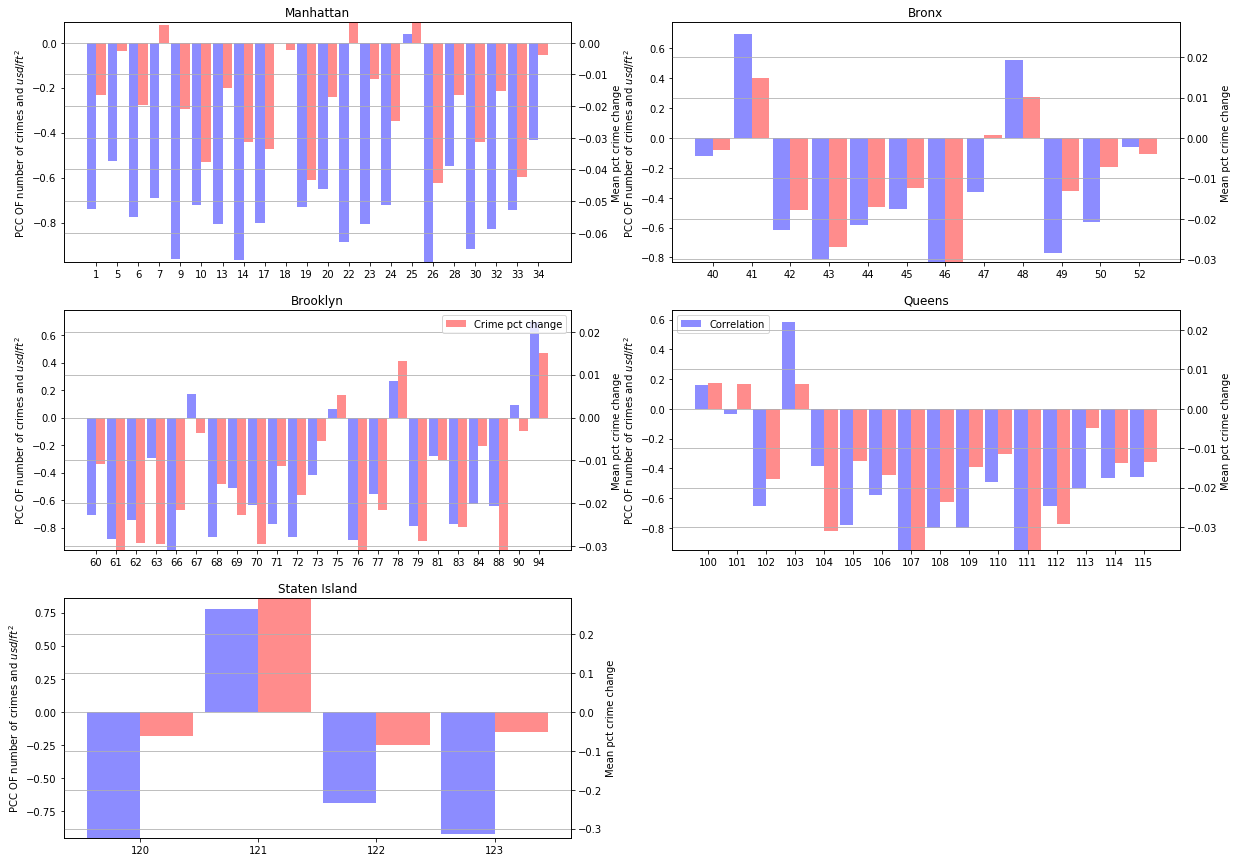

In [75]:
bar_width = 0.45
opacity = 0.45
plt.subplots(figsize=(20,15))
plt.subplot(3,2,1)

i = 1
for corr, mcc, borough in zip([corr_mn, corr_bx, corr_bk, corr_qn, corr_si],
                     [mcc_mn, mcc_bx, mcc_bk, mcc_qn, mcc_si],
                     ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']):
    
    ax = plt.subplot(3,2,i)
    ax1 = ax.twinx()
    n_groups = len(corr)
    corrs = corr.values()
    mccs = mcc.values()
    index = np.arange(n_groups)
    
    rects = ax.bar(index, corrs, bar_width, alpha=opacity, color='b', label='Correlation')
    rects2 = ax1.bar(index+bar_width, mccs, bar_width, alpha=opacity, color='r', label='Crime pct change')

    
    #for rect, label in zip(rects, mccs):
    #    height = rect.get_height()
    #    ax.text(rect.get_x() + rect.get_width()/2, height + 5, str(label), ha='center', va='bottom')

    plt.xticks(index + bar_width / 2, corr.keys())
    plt.grid()
    align_yaxis(ax, 0, ax1, 0)
    plt.title(borough)
    if i == 4:
        ax.legend(loc='upper left')
    if i == 3:
        ax1.legend(loc='upper left')
    
    ax.set_ylabel("PCC OF number of crimes and $usd/ft^2$")
    ax1.set_ylabel("Mean pct crime change")

    i += 1
    




In [ ]:
corrs = corr.values()
mccs = mcc.values()
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.45
rects = plt.bar(index, corrs, bar_width, color='b')
rects2 = plt.bar(index+bar_width, mccs, bar_width, color='r')
history


In [79]:
# Create output file to convert in map
with open('./data_visualization/precinct_gent_corr.out', 'w') as out:
    for p, c in correlations.items():
        out.write("('{}', {})\n".format(p, c))

## Plot crimes in precinct 121 by year. 

In [81]:
crimes = pd.read_csv('./data_visualization/data/by_precinct_year.out',
                     sep='\t', header=None)

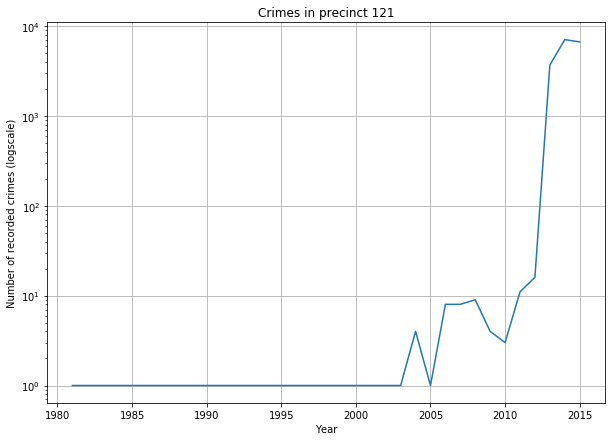

In [89]:
crimes121 = crimes[crimes[1] == 121]
plt.subplots(figsize=(10,7))
plt.plot(crimes121[0], crimes121[2])
plt.title('Crimes in precinct 121')
plt.xlabel('Year')
plt.ylabel('Number of recorded crimes (logscale)')
plt.grid()
plt.yscale('log')